# Module 6 — SVM Practice (Student Notebook)
Goal: practice linear and non-linear SVMs on a shared dataset.
Write your own code. Only the dataset cell is provided.

In [ ]:
# Step 0 — Imports (you may add more if needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

np.random.seed(42)

## Step 1 — Shared dataset
Two features that make sense to students: Hours and Attendance.  
Target: `Passed ∈ {0, 1}`.  
You will **not** modify this cell, so everyone uses the same data.

In [ ]:
# Provided: build the shared dataset
n = 120
hours = np.random.uniform(1, 10, n)
attendance = np.random.uniform(50, 100, n)

# Simple latent score with noise
score = 0.5 * hours + 0.05 * attendance + np.random.normal(0, 1.5, n)
passed = (score > 8).astype(int)

df = pd.DataFrame({"Hours": hours, "Attendance": attendance, "Passed": passed})
display(df.head())
print("Class balance (mean of Passed):", df["Passed"].mean().round(3))

,Hours,Attendance,Passed
0,4.370861,90.372008,0
1,9.556429,94.804565,1
2,7.587945,65.900174,0
3,6.387926,55.502596,0
4,2.404168,61.396758,0


Class balance (mean of Passed): 0.233


## Step 2 — Quick visualization
Scatter plot Hours vs Attendance colored by Passed.  
Helps you guess whether a linear split might work.

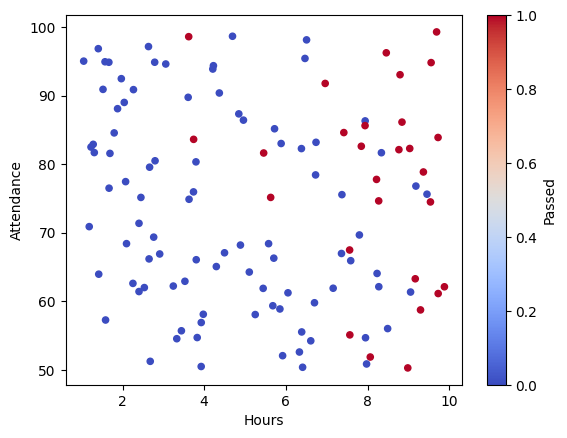

Text(0.5, 1.0, 'Hours vs Attendance')

In [ ]:
# TODO:
# 1) Make a scatter plot of Hours vs Attendance, color by Passed.
plot = df.plot.scatter(x="Hours", y="Attendance", c="Passed", cmap="coolwarm" )

plt.show()

# 2) Label axes and title clearly.
plot.set_xlabel("Hours")
plot.set_ylabel("Attendance")
plot.set_title("Hours vs Attendance")


## Step 3 — Train/test split + scaling
Split the data with stratification.  
Scale features using `StandardScaler` fitted on the train set only.

In [ ]:
# TODO:
# 1) X = df[["Hours", "Attendance"]]; y = df["Passed"]
X = df[["Hours", "Attendance"]]
y = df["Passed"]
# 2) train_test_split with stratify=y, random_state=42, test_size=0.25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# 3) Fit scaler on X_train only, transform X_train and X_test

scaler = StandardScaler()
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)


## Step 4 — Linear SVM
Train a linear SVM on scaled features. Report accuracy, F1, and a classification report.

In [ ]:
# TODO:
# 1) Create SVC(kernel="linear", C=1.0, random_state=42)
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)

# 2) Fit on X_train_scaled, y_train
linear_svm.fit(scaled_x_train, y_train)
# 3) Predict on X_test_scaled
y_pred_linear = linear_svm.predict(scaled_x_test)
# 4) Print accuracy and F1 with three decimals
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear), 3))
# 5) Print classification report
print(classification_report(y_test, y_pred_linear))


Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.85      0.89      0.87        30
weighted avg       0.91      0.90      0.90        30



## Step 5 — Visualize linear decision boundary
Make a helper that plots the decision regions and the training points in scaled space. Then call it for the linear model.

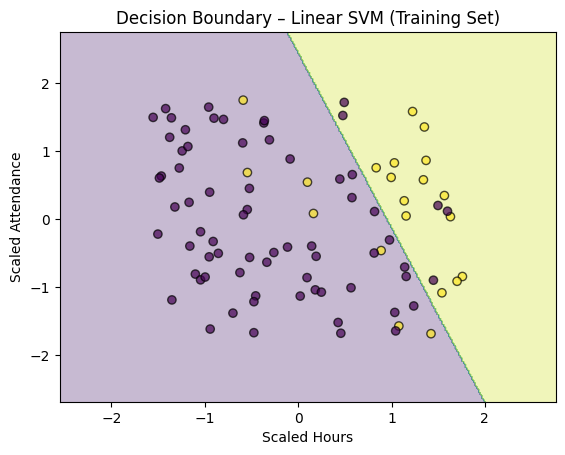

In [ ]:
# ---- Train a Linear SVM ----
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(scaled_x_train, y_train)

# ---- Decision Boundary Plot Function ----
def plot_boundary(model, X_scaled, y, title):
    # Create a meshgrid covering the feature space
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot actual points
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', alpha=0.7)

    plt.title(title)
    plt.xlabel("Scaled Hours")
    plt.ylabel("Scaled Attendance")
    plt.show()

# ---- Call the function on training data ----
plot_boundary(svm_linear, scaled_x_train, y_train, "Decision Boundary – Linear SVM (Training Set)")



## Step 6 — Try non-linear kernels (Polynomial and RBF)
Train `SVC` with `kernel="poly"` (degree 3) and `kernel="rbf"`. Compare accuracy and F1 to the linear model.

In [ ]:

# TODO:
# 1) Train poly SVM (degree=3). Evaluate on test.
poly_svm = SVC(kernel="poly", degree=3, random_state=42)
poly_svm.fit(scaled_x_train, y_train)
y_pred_poly = poly_svm.predict(scaled_x_test)
# 2) Train rbf SVM. Evaluate on test.
rbf_svm = SVC(kernel="rbf", random_state=42)
rbf_svm.fit(scaled_x_train, y_train)
y_pred_rbf = rbf_svm.predict(scaled_x_test)
# 3) Print a small table or clear prints for all three models.
results = pd.DataFrame({
    "Model": ["Polynomial SVM (degree=3)", "RBF SVM", "Linear SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_poly),
        accuracy_score(y_test, y_pred_rbf),
        accuracy_score(y_test, y_pred_linear)
    ],
    "Precision": [
        precision_score(y_test, y_pred_poly),
        precision_score(y_test, y_pred_rbf),
        precision_score(y_test, y_pred_linear)
    ],
    "Recall": [
        recall_score(y_test, y_pred_poly),
        recall_score(y_test, y_pred_rbf),
        recall_score(y_test, y_pred_linear)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_poly),
        f1_score(y_test, y_pred_rbf),
        f1_score(y_test, y_pred_linear)
    ]
})

print(results.sort_values(by="Accuracy", ascending=True))


                       Model  Accuracy  Precision    Recall  F1 Score
1                    RBF SVM  0.833333   0.666667  0.571429  0.615385
0  Polynomial SVM (degree=3)  0.900000   0.833333  0.714286  0.769231
2                 Linear SVM  0.900000   0.750000  0.857143  0.800000


## Step 7 — Boundary plots for poly and RBF
Use your plot function to visualize their decision surfaces.

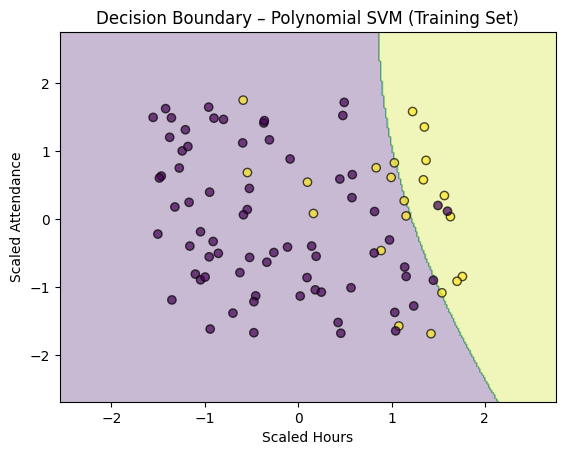

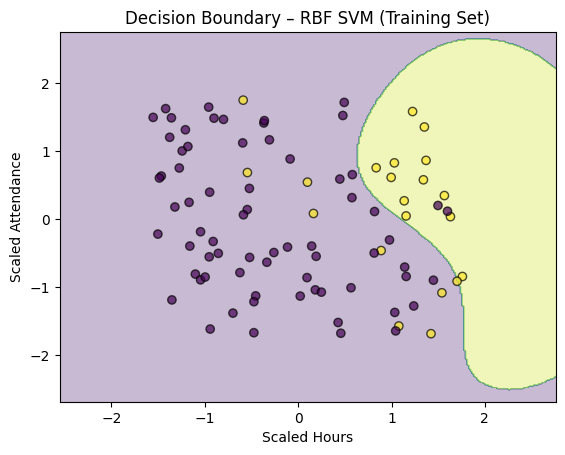

In [ ]:
# TODO:
# 1) Plot boundary for poly SVM
plot_boundary(poly_svm, scaled_x_train, y_train, "Decision Boundary – Polynomial SVM (Training Set)")

# 2) Plot boundary for rbf SVM
plot_boundary(rbf_svm, scaled_x_train, y_train, "Decision Boundary – RBF SVM (Training Set)")


## Step 8 — Confusion matrix
Pick your best model and show the confusion matrix on the test set.

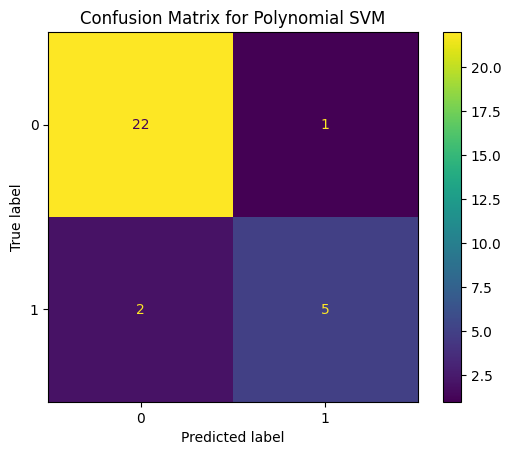

In [ ]:
# TODO:
# 1) Compute predictions for the best model
y_pred_best = poly_svm.predict(scaled_x_test)
# 2) Use ConfusionMatrixDisplay.from_predictions(...)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Confusion Matrix for Polynomial SVM")
plt.show()
# 3) Add a title



## Step 9 — Support vectors (inspection)
For each trained model, inspect how many support vectors it used.

In [ ]:
# TODO:For each trained model, inspect how many support vectors it used.
# 1) Access attribute .support_vectors_ for each model
support_vectors_linear = linear_svm.support_vectors_
support_vectors_poly = poly_svm.support_vectors_
support_vectors_rbf = rbf_svm.support_vectors_
# 2) Print counts and a brief comparison
print("Linear SVM Support Vectors:", len(support_vectors_linear))
print("Polynomial SVM Support Vectors:", len(support_vectors_poly))
print("RBF SVM Support Vectors:", len(support_vectors_rbf))


Linear SVM Support Vectors: 36
Polynomial SVM Support Vectors: 35
RBF SVM Support Vectors: 43


## Step 10 — Short interpretation
Three short paragraphs:
1) Which model performed best and why that makes sense given the scatter plot.  
2) What the boundary plots suggest about the relationship between Hours and Attendance.  
3) What you would try next to improve performance (feature ideas or hyperparameters like C and gamma).

In [ ]:
# TODO:
# Write 3–5 sentences in a markdown cell above, or print them here as a string.

1) Which model performed best and why that makes sense given the scatter?

Linear SVM performed is best, with an accuracy of 0.90 and an F1 score of 0.80. This suggests that the relationship between Hours and Attendance is roughly linear. Both Hours and Attendance increase the likelihood of passing in a steady, predictable way — so a linear boundary fits well.

2) What the boundary plots suggest about the relationship between Hours and Attendance?

The linear decision boundary provides a clean and balanced split between classes.
The polynomial kernel achieved similar accuracy but slightly lower F1.
The RBF kernel performed the worst, showing that the dataset doesn’t require complex nonlinear transformations.


3) What you would try next to improve performance (feature ideas or hyperparameters like C and gamma)?

To improve performance, I can fine-tune the C parameter (controls the trade-off between margin width and misclassification).Adding new features — class participation and home work completion — could also increase predictive power.